
Proceso de generación de valor por extración de datos


In [3]:
#Importando librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import os

In [4]:
%matplotlib inline

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


# Importar Datos e Identificar variables a limpiar

In [6]:
#Funcion para concatenar todos los CSV
def concat_csv(folder_path, encoding='unicode_escape'):
     #Lista de los archivos CSV
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    #Initializa nuevo dataframe donde guardarlos todos
    combined_df = pd.DataFrame()

    #Concatena los archivos CSV
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(file_path, encoding=encoding)
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    return combined_df

#Usando la funcion para crear el dataframe
folder_path = '/content/drive/MyDrive/superstore'
superstore = concat_csv(folder_path)

In [7]:
#Vista inicial del nuevo superstore
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unnamed: 0
0,7694,MX-2011-157049,13-06-2011,13-06-2011,Same Day,BD-11560,Brendan Dodson,Home Office,Cuajimalpa,Distrito Federal,...,Technology,Copiers,"Canon Fax Machine, High-Speed",631.91364,3,0.002,87.35364,78.28,Critical,NaN
1,15772,ES-2011-1276768,13-06-2011,18-06-2011,Standard Class,JO-15145,Jack O'Briant,Corporate,Thonon-les-Bains,Rhône-Alpes,...,Furniture,Bookcases,"Dania Stackable Bookrack, Mobile",437.72400,4,0.100,165.32400,68.34,High,NaN
2,10075,US-2011-102288,13-06-2011,17-06-2011,Standard Class,KT-16465,Kean Takahito,Consumer,Presidente Dutra,Maranhão,...,Furniture,Chairs,"Office Star Bag Chairs, Set of Two",215.37600,14,0.600,-231.78400,39.85,High,NaN
3,15771,ES-2011-1276768,13-06-2011,18-06-2011,Standard Class,JO-15145,Jack O'Briant,Corporate,Thonon-les-Bains,Rhône-Alpes,...,Furniture,Bookcases,"Sauder Corner Shelving, Metal",264.16800,2,0.100,55.72800,30.14,High,NaN
4,27155,IN-2011-51390,13-06-2011,17-06-2011,Standard Class,RB-19705,Roger Barcio,Home Office,Palembang,Sumatera Selatan,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",332.52960,1,0.270,18.21960,30.14,Medium,NaN


In [8]:
#informacion general
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112840 entries, 0 to 112839
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Row ID          112840 non-null  int64  
 1   Order ID        112840 non-null  object 
 2   Order Date      112840 non-null  object 
 3   Ship Date       112840 non-null  object 
 4   Ship Mode       112840 non-null  object 
 5   Customer ID     112840 non-null  object 
 6   Customer Name   112840 non-null  object 
 7   Segment         112840 non-null  object 
 8   City            112840 non-null  object 
 9   State           112840 non-null  object 
 10  Country         112840 non-null  object 
 11  Postal Code     63189 non-null   float64
 12  Market          112840 non-null  object 
 13  Region          112840 non-null  object 
 14  Product ID      112840 non-null  object 
 15  Category        112840 non-null  object 
 16  Sub-Category    112840 non-null  object 
 17  Product Na

In [9]:
#Buscando columnas con valores vacios
superstore.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       49651
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
Unnamed: 0        61550
dtype: int64

# Limpieza de Datos

In [10]:
#Llenando valores vacios para la columna Postal code
default_postal_code = '00000.0'
superstore['Postal Code'].fillna(default_postal_code, inplace=True)

In [11]:
superstore.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code           0
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
Unnamed: 0        61550
dtype: int64

In [12]:
#Buscando duplicados en la columna 'Row ID'
superstore['Row ID'].nunique()

51290

In [13]:
#Removiendo filas duplicadas
superstore.drop_duplicates(subset='Row ID', keep='first', inplace=True)

In [14]:
#Corrigiendo tipo de datos para las columnas

#Cambiando 'Order ID', 'Customer ID', and 'Product ID' a int
superstore['Order ID'] = superstore['Order ID'].astype(str)
superstore['Customer ID'] = superstore['Customer ID'].astype(str)
superstore['Product ID'] = superstore['Product ID'].astype(str)

#Cambiando 'Order Date', 'Ship Date' a fecha
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'])


#Cambiando el resto de columnas a categorias
superstore['Ship Mode'] = superstore['Ship Mode'].astype('category')
superstore['Order Priority'] = superstore['Order Priority'].astype('category')
superstore['Segment'] = superstore['Segment'].astype('category')
superstore['State'] = superstore['State'].astype('category')
superstore['Country'] = superstore['Country'].astype('category')
superstore['Market'] = superstore['Market'].astype('category')
superstore['Region'] = superstore['Region'].astype('category')
superstore['Category'] = superstore['Category'].astype('category')
superstore['Sub-Category'] = superstore['Sub-Category'].astype('category')

<ipython-input-14-5069a9985530>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])
<ipython-input-14-5069a9985530>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'])


In [15]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 61549
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  category      
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  category      
 8   City            51290 non-null  object        
 9   State           51290 non-null  category      
 10  Country         51290 non-null  category      
 11  Postal Code     51290 non-null  object        
 12  Market          51290 non-null  category      
 13  Region          51290 non-null  category      
 14  Product ID      51290 non-null  object        
 15  Ca

# Creación de nueva base de datos en Google Drive

In [17]:
superstore.to_csv('/content/drive/MyDrive/superstore/superstore_final.csv', index=False)

# Explorando datos

Conectar a la nueva base de datos

In [18]:
superstore_cleaned = pd.read_csv('/content/drive/MyDrive/superstore/superstore_final.csv')

# Analizando Categorías, tendencias, medias y creando valor

Su función será crear un "deep dive" que explorara 2 a 4 preguntas de negocios que pueda hacer con los datos: ¿Cuál es el mejor día de la semana de ventas? etc. Como mínimo su análisis debe incluir:

- Comparar dos variables con al menos una segmentación por categoría
- Analizar gráficamente multiples variables numéricas
- Plot charts, Gráficos de tendencia y Barra con su análisis de que significa
- Utilizar las ideas anteriores como sea necesario para cada pregunta de negocio.



In [19]:
superstore_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     51290 non-null  float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [20]:
#Cambiando 'Order ID', 'Customer ID', and 'Product ID' a int
superstore_cleaned['Order ID'] = superstore_cleaned['Order ID'].astype(str)
superstore_cleaned['Customer ID'] = superstore_cleaned['Customer ID'].astype(str)
superstore_cleaned['Product ID'] = superstore_cleaned['Product ID'].astype(str)

#Cambiando 'Order Date', 'Ship Date' a fecha
superstore_cleaned['Order Date'] = pd.to_datetime(superstore_cleaned['Order Date'])
superstore_cleaned['Ship Date'] = pd.to_datetime(superstore_cleaned['Ship Date'])


#Cambiando el resto de columnas a categorias
superstore_cleaned['Ship Mode'] = superstore_cleaned['Ship Mode'].astype('category')
superstore_cleaned['Order Priority'] = superstore_cleaned['Order Priority'].astype('category')
superstore_cleaned['Segment'] = superstore_cleaned['Segment'].astype('category')
superstore_cleaned['State'] = superstore_cleaned['State'].astype('category')
superstore_cleaned['Country'] = superstore_cleaned['Country'].astype('category')
superstore_cleaned['Market'] = superstore_cleaned['Market'].astype('category')
superstore_cleaned['Region'] = superstore_cleaned['Region'].astype('category')
superstore_cleaned['Category'] = superstore_cleaned['Category'].astype('category')
superstore_cleaned['Sub-Category'] = superstore_cleaned['Sub-Category'].astype('category')

In [ ]:
#Analisis
#Pregunta - Como se comparan en ganancias los diferentes segmentos?

#Separar por segmentos y comparar su media
segmentos_df = superstore_cleaned.groupby('Segment')['Profit'].mean()

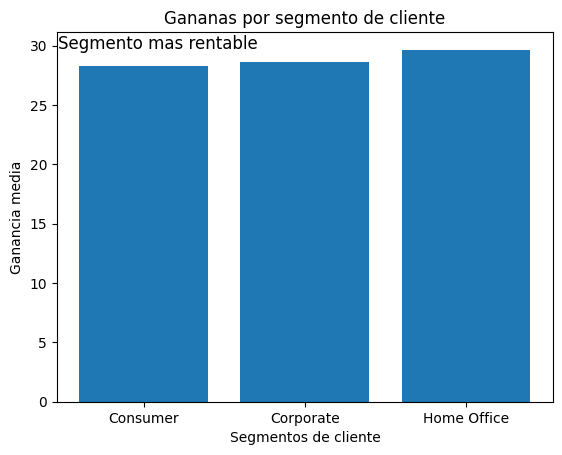

In [ ]:
#visualizar la comparacion
plt.bar(segmentos_df.index, segmentos_df.values)

#Agregar etiquetas y titulo
plt.xlabel('Segmentos de cliente')
plt.ylabel('Ganancia media')
plt.title('Gananas por segmento de cliente')

plt.show()

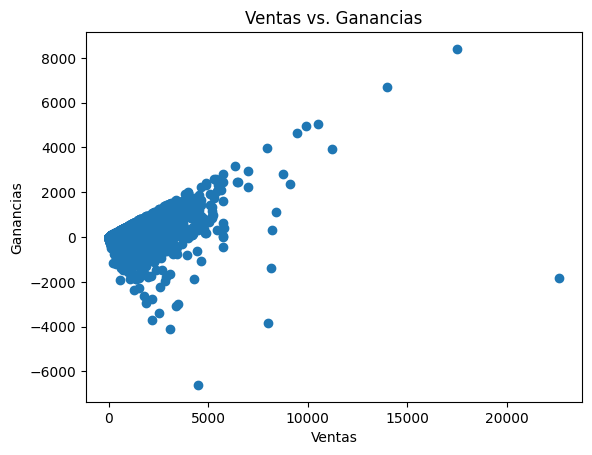

In [ ]:
#Comparando ventas con Ganancias
plt.scatter(superstore_cleaned['Sales'],
            superstore_cleaned['Profit'])


#Agregando etiquetas
plt.xlabel('Ventas')
plt.ylabel('Ganancias')
plt.title('Ventas vs. Ganancias')

plt.show()

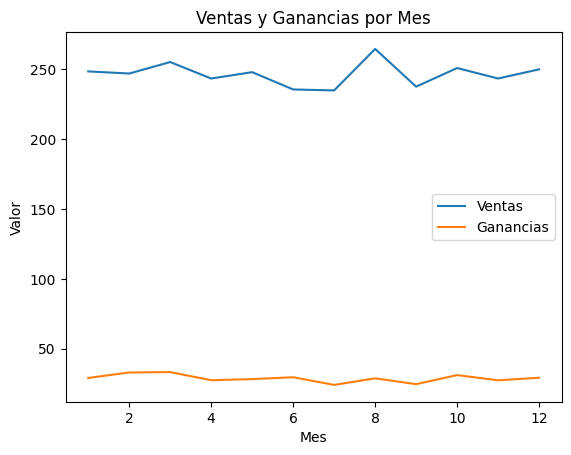

In [22]:
#Dividiendo ventas y ganancias por mes
ventas_por_mes = superstore_cleaned['Sales'].groupby(superstore_cleaned['Order Date'].dt.month).mean()
ganancias_por_mes = superstore_cleaned['Profit'].groupby(superstore_cleaned['Order Date'].dt.month).mean()

ventas_ganancias_por_mes = pd.DataFrame({'Mes': ventas_por_mes.index, 'Ventas': ventas_por_mes.values, 'Ganancias': ganancias_por_mes.values})

sns.lineplot(x='Mes', y='Ventas', data=ventas_ganancias_por_mes, label='Ventas')
sns.lineplot(x='Mes', y='Ganancias', data=ventas_ganancias_por_mes, label='Ganancias')

plt.xlabel('Mes')
plt.ylabel('Valor')
plt.title('Ventas y Ganancias por Mes')

plt.legend()

plt.show()

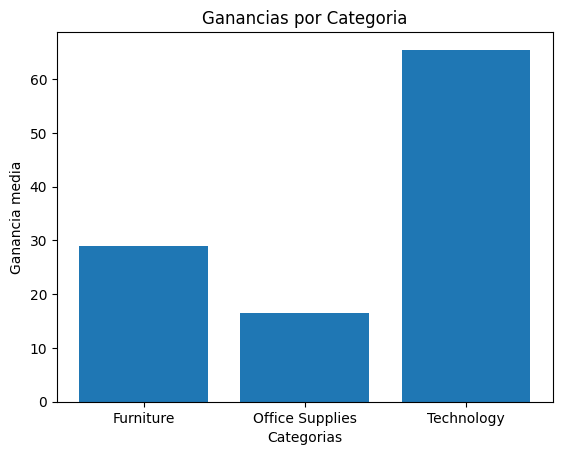

In [ ]:
#Media de ganancias por categorias
categorias = superstore_cleaned.groupby('Category')['Profit'].mean()

plt.bar(categorias.index, categorias.values)

#Agregar etiquetas y titulo
plt.xlabel('Categorias')
plt.ylabel('Ganancia media')
plt.title('Ganancias por Categoria')

plt.show()

# Conclusiones

In [ ]:
# Hay una relacion positiva entre las ventas y las granancias
# El segmento que mas rentable es el Home Office
# La categoria que mas vende es la de tecnologia
# Agosto es el mes en el que mas se vendio en cuanto a ventas medias